In [ ]:
import torch
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:

# Define the transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

In [ ]:
# for batch_index , (data,target) in enumerate(train_loader):
#   if batch_index ==  2 :
#     break
#   print(batch_index)
#   image , label  = data[1] , target[1]
#   image = image.squeeze()
#   plt.imshow(image , cmap = 'gray')
#   plt.title(f'Label:{label}')
#   plt.show()

In [ ]:
# image , label = train_dataset[0]
# image = image.squeeze()
# print(image.shape)
# plt.imshow(image, cmap='gray')
# plt.title(f'Label: {label}')
# plt.show()

In [ ]:
# Define the dimensions
n_input = 784       # Number of input features (e.g., 28x28 images flattened)
n_hidden_1 = 512    # Number of neurons in the first hidden layer
n_hidden_2 = 128    # Number of neurons in the second hidden layer
n_classes = 10      # Number of output classes (e.g., digits 0-9)

In [ ]:
import torch
import torch.nn as nn

class MultiLayer(nn.Module):
    def __init__(self, n_input, n_hidden_1, n_hidden_2, n_classes,dropout_rate):
        super(MultiLayer, self).__init__()
        # Define the layers using nn.Linear
        self.fc1 = nn.Linear(n_input, n_hidden_1)
        self.bn1 = nn.BatchNorm1d(n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_classes)
        self.dropout = nn.Dropout(dropout_rate)

        # Initialize the weights with Xavier initialization
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)

    def forward(self, x):
        # Apply the first linear layer with sigmoid activation
        x = x.view(-1, 784)

        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)

        # Apply the second linear layer with sigmoid activation
        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout(x)
        # Apply the output linear layer (without activation)
        x = self.fc3(x)
        x = torch.softmax(x, dim=1)
        return x

In [ ]:
model = MultiLayer(n_input, n_hidden_1, n_hidden_2, n_classes, dropout_rate=0.3)

In [ ]:
from torchsummary import summary
summary(model, input_size=(784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
       BatchNorm1d-2                  [-1, 512]           1,024
           Dropout-3                  [-1, 512]               0
            Linear-4                  [-1, 128]          65,664
       BatchNorm1d-5                  [-1, 128]             256
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 10]           1,290
Total params: 470,154
Trainable params: 470,154
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.79
Estimated Total Size (MB): 1.81
----------------------------------------------------------------


In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# Initialize lists to store loss values
train_losses = []
test_losses = []
epochs = []
import matplotlib.pyplot as plt
def plot_losses(epochs, train_losses, test_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, 'b', label="Train Loss")
    plt.plot(epochs, test_losses, 'r', label="Test Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Training

In [ ]:
n_epochs = 5
from tqdm import tqdm

for epoch in tqdm(range(n_epochs)):
  start_time = time.time()
  model.train()
  train_loss = 0
  for batch_idx , (data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*data.size(0)

  train_loss /= len(train_loader.dataset)  # average loss for epoch
  train_losses.append(train_loss)
  epochs.append(epoch + 1)


  # Testing the loss
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data , target in test_loader:
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item() * data.size(0)  # accumulate loss
      _, predicted = torch.max(output.data, 1)
      correct += (predicted == target).sum().item()

  test_loss /= len(test_loader.dataset)  # average loss for epoch
  test_losses.append(test_loss)
  end_time = time.time()  # End timing
  epoch_duration = end_time - start_time  # Duration of the epoch
  print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {100 * correct / len(test_loader.dataset):.2f}%')


 20%|██        | 1/5 [00:21<01:24, 21.00s/it]

Epoch 1/5, Train Loss: 1.4884, Test Loss: 1.4816, Accuracy: 98.11%


 40%|████      | 2/5 [00:42<01:03, 21.20s/it]

Epoch 2/5, Train Loss: 1.4859, Test Loss: 1.4809, Accuracy: 98.16%


 60%|██████    | 3/5 [01:03<00:41, 20.99s/it]

Epoch 3/5, Train Loss: 1.4844, Test Loss: 1.4799, Accuracy: 98.24%


 80%|████████  | 4/5 [01:23<00:20, 20.90s/it]

Epoch 4/5, Train Loss: 1.4834, Test Loss: 1.4796, Accuracy: 98.27%


100%|██████████| 5/5 [01:45<00:00, 21.01s/it]

Epoch 5/5, Train Loss: 1.4830, Test Loss: 1.4791, Accuracy: 98.33%


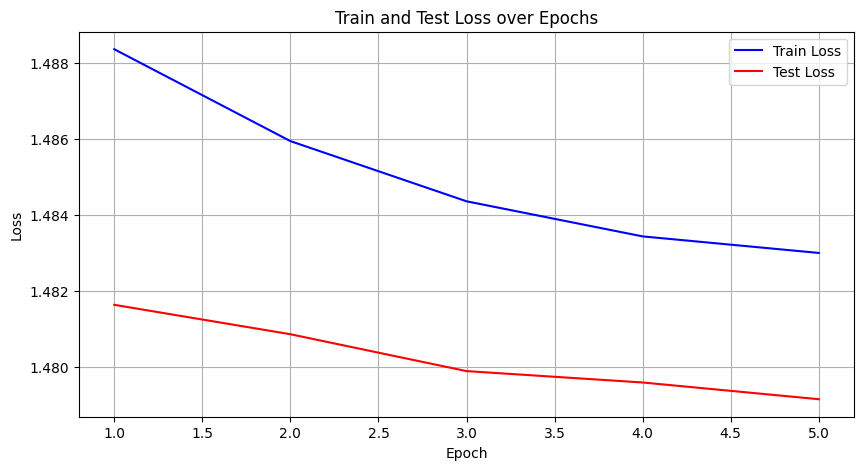

In [ ]:
# Plot losses
plot_losses(epochs, train_losses, test_losses)

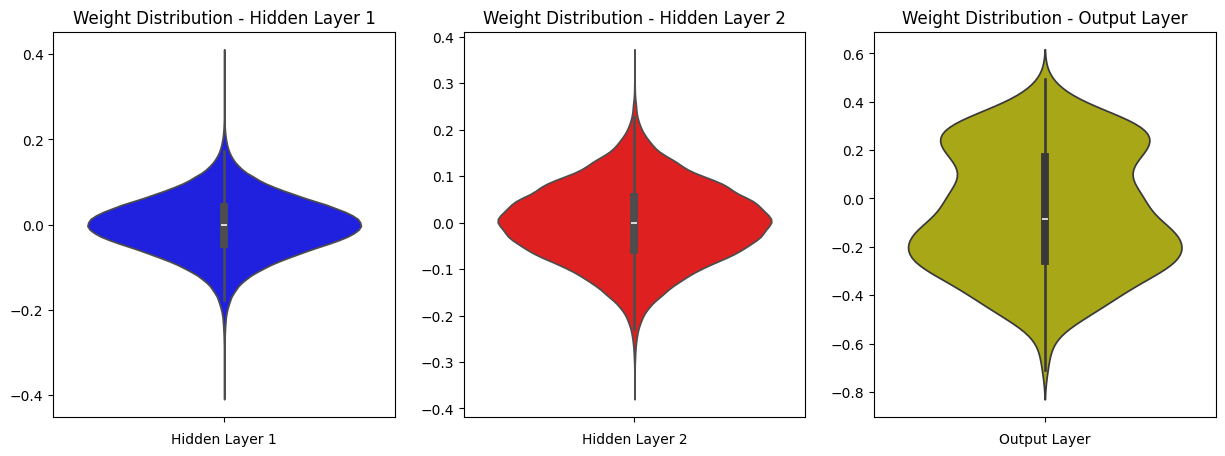

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `model` is your trained MultiLayer instance

# Extract weights from the layers and move them to the CPU
h1_w = model.fc1.weight.detach().cpu().numpy().flatten()  # Hidden Layer 1
h2_w = model.fc2.weight.detach().cpu().numpy().flatten()  # Hidden Layer 2
out_w = model.fc3.weight.detach().cpu().numpy().flatten()  # Output Layer

# Create plots
fig = plt.figure(figsize=(15, 5))

# Hidden Layer 1
plt.subplot(1, 3, 1)
plt.title("Weight Distribution - Hidden Layer 1")
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

# Hidden Layer 2
plt.subplot(1, 3, 2)
plt.title("Weight Distribution - Hidden Layer 2")
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

# Output Layer
plt.subplot(1, 3, 3)
plt.title("Weight Distribution - Output Layer")
sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')

plt.show()


In [ ]:
epoch_duration

21.68397068977356

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import numpy as np
model.eval()

MultiLayer(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
sample_image, true_label = test_dataset[0]
sample_image = sample_image

In [ ]:
output = model(sample_image)

In [ ]:
_, predicted_label = torch.max(output, 1)

In [ ]:
sample_image = sample_image.squeeze().cpu().numpy()
predicted_label = predicted_label.item()

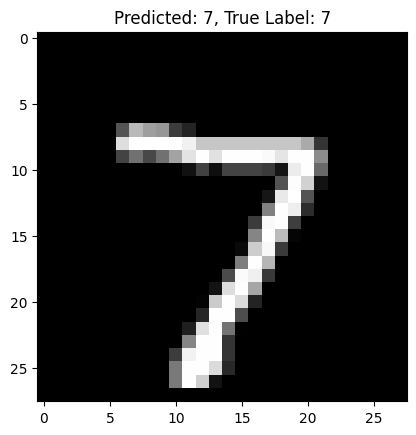

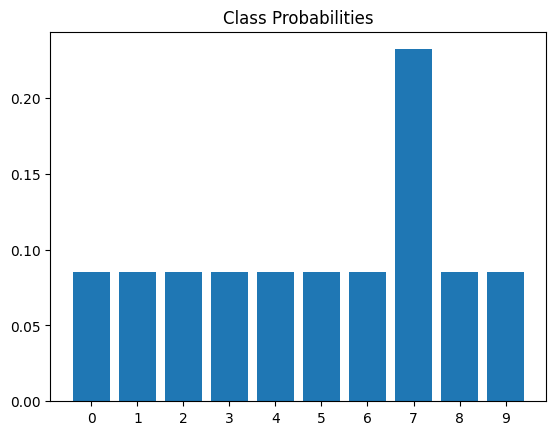

In [ ]:
# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, True Label: {true_label}")
plt.show()

# If you want to visualize the output probabilities:
output_probs = torch.softmax(output, dim=1).cpu().detach().numpy()
plt.bar(range(10), output_probs[0])
plt.xticks(range(10))
plt.title("Class Probabilities")
plt.show()